In [3]:
import pandas as pd # data manipulation
import numpy as np #numerical computation,arrays
import matplotlib.pyplot as plt #plotting data & creating visualation
import seaborn as sms #plotting data & creating visualation
import plotly.express as px #plotting data & creating visualation
from plotly.subplots import make_subplots
from datetime import datetime

In [34]:
kidney_df =pd.read_csv("D:\project\kidney_disease.csv")

In [7]:
kidney_df.head(10) 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [8]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
# To see what are the column names in our dataset
print(kidney_df.columns)

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [5]:
kidney_df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
kidney_df.max()

C:\Users\Asus\AppData\Local\Temp\ipykernel_3592\2477115061.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kidney_df.max()


id                   399
age                 90.0
bp                 180.0
sg                 1.025
al                   5.0
su                   5.0
bgr                490.0
bu                 391.0
sc                  76.0
sod                163.0
pot                 47.0
hemo                17.8
classification    notckd
dtype: object

In [9]:
kidney_df.min()

C:\Users\Asus\AppData\Local\Temp\ipykernel_3592\2417644597.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kidney_df.min()


id                    0
age                 2.0
bp                 50.0
sg                1.005
al                  0.0
su                  0.0
bgr                22.0
bu                  1.5
sc                  0.4
sod                 4.5
pot                 2.5
hemo                3.1
classification      ckd
dtype: object

In [6]:
kidney_df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [11]:
kidney_df.shape

(400, 26)

In [ ]:
#df['X1'] = df['X1'].fillna(df['X1'].mean())
#df['X2'] = df['X2'].fillna(df['X2'].median())

In [8]:
kidney_df.head(10) 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
#1.	With regard to your collected data perform the following preprocessing:
#a.	Missing values
#b.	Skewness
#c.	Multicollinearity
#d.	Standardization if required
#e.	Class imbalance
#f.	Outliers
#2.	Perform at least two Exploratory data analysis for your dataset and visualize them.


In [9]:
#kidney_df['rbc'] = kidney_df['rbc'].fillna(kidney_df['rbc'].mode())
#kidney_df['pc'] = kidney_df['pc'].fillna(kidney_df['pc'].mode())
#kidney_df['pcc'] = kidney_df['pcc'].fillna(kidney_df['pcc'].mode())
#kidney_df['ba'] = kidney_df['ba'].fillna(kidney_df['ba'].mode())
#kidney_df['htn'] = kidney_df['htn'].fillna(kidney_df['htn'].mode())
#kidney_df['dm'] = kidney_df['dm'].fillna(kidney_df['dm'].mode())
#kidney_df['cad'] = kidney_df['cad'].fillna(kidney_df['cad'].mode())
#kidney_df['appet'] = kidney_df['appet'].fillna(kidney_df['appet'].mode())
#kidney_df['pe'] = kidney_df['pe'].fillna(kidney_df['pe'].mode())
#kidney_df['ane'] = kidney_df['ane'].fillna(kidney_df['ane'].mode())

In [12]:
#col=['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
#for i in col:
#    kidney_df[col] = kidney_df[col].fillna(kidney_df[col].mode())
    

In [13]:
kidney_df.head(10) 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [14]:
#kidney_df.rbc.unique()

array(['normal', nan, 'abnormal'], dtype=object)

In [16]:
#kidney_df['rbc'] = kidney_df['rbc'].fillna(kidney_df['rbc'].mode())

In [17]:
kidney_df.head(10)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [52]:
#mode new
kidney_df=kidney_df.fillna(kidney_df.mode().loc[0])
kidney_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [8]:
kidney_df.head(30)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,normal,normal,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,normal,normal,notpresent,notpresent,...,36,9800,5.2,no,no,no,good,no,no,ckd
7,7,24.0,80.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


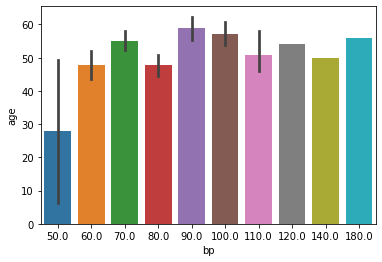

In [22]:
sms.barplot(x = 'bp' , y  = 'age' , data = kidney_df)
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


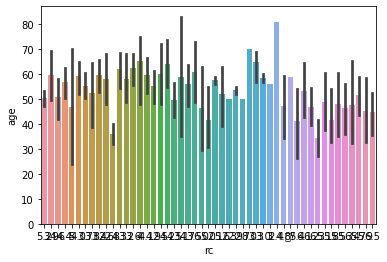

In [24]:
sms.barplot(x = 'rc' , y  = 'age' , data = kidney_df)
plt.show()

In [6]:
col=kidney_df[['id','age','bp','sg','al','su',
               'rbc','pc','pcc','ba','bgr',
               'bu','sc','sod','pot','hemo',
               'pcv','wc','rc','htn','dm',
               'cad','appet','pe','ane','classification']]
for i in col:
    print(i,"\t",col[i].unique())

id 	 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 2

In [45]:
#replacing \t?,\t43,\t?,\t6200,\t8400,ck\t
kidney_df['pcv']=kidney_df['pcv'].replace(to_replace = '\t?',value=np.nan)
kidney_df['pcv']=kidney_df['pcv'].replace(to_replace = '\t43',value=43)
kidney_df['pcv']=kidney_df['pcv'].replace(to_replace ='nan' ,value=np.nan)
kidney_df['wc']=kidney_df['wc'].replace(to_replace = '\t?',value=np.nan)
kidney_df['wc']=kidney_df['wc'].replace(to_replace = '\t6200',value=6200)
kidney_df['wc']=kidney_df['wc'].replace(to_replace = '\t8400',value=8400)
kidney_df['rc']=kidney_df['rc'].replace(to_replace = '\t?',value=np.nan)
kidney_df['dm']=kidney_df['dm'].replace(to_replace = '\tno',value='no')
kidney_df['dm']=kidney_df['dm'].replace(to_replace = '\tyes',value='yes')
kidney_df['cad']=kidney_df['cad'].replace(to_replace = '\tno',value='no')
kidney_df['classification']=kidney_df['classification'].replace(to_replace = 'ckd\t',value='ckd')

In [46]:
#id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
col=kidney_df[['id','age','bp','sg','al','su',
               'rbc','pc','pcc','ba','bgr',
               'bu','sc','sod','pot','hemo',
               'pcv','wc','rc','htn','dm',
               'cad','appet','pe','ane','classification']]
for i in col:
    print(i,"\t",col[i].unique())

id 	 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 2

In [10]:
kidney_df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [47]:
kidney_df.drop(["id"],inplace=True,axis=1) #dropping a column id

In [48]:
#deleting null values of age 
delage =kidney_df[(kidney_df['age'].isnull())].index
kidney_df.drop(delage , inplace=True)
kidney_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [49]:
kidney_df.isnull().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               147
pc                 61
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                68
wc                101
rc                125
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [25]:
kidney_df. dtypes. value_counts() 

object     14
float64    11
dtype: int64

In [24]:
col=kidney_df[['bp','sg','al','su',
               'rbc','pc','pcc','ba','bgr',
               'bu','sc','sod','pot','hemo',
               'pcv','wc','rc','htn','dm',
               'cad','appet','pe','ane','classification']]
for i in col:
    print(i,"\t",col[i].unique())

bp 	 [ 80.  50.  70.  90. 100.  60. 110. 140. 180. 120.]
sg 	 [1.02  1.01  1.005 1.015 1.025]
al 	 [1. 4. 2. 3. 0. 5.]
su 	 [0. 3. 4. 1. 2. 5.]
rbc 	 ['normal' 'abnormal']
pc 	 ['normal' 'abnormal']
pcc 	 ['notpresent' 'present']
ba 	 ['notpresent' 'present']
bgr 	 [121. 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98. 157.
  76.  99. 114. 263. 173.  95. 108. 156. 264. 123. 107. 159. 140. 171.
 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246.  93. 253. 141.
 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158. 165.
 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172. 101.
 298. 153.  88. 226. 143. 115.  89. 297. 233. 294. 323. 125.  90. 308.
 118. 224. 128. 122. 214. 213. 268. 256.  84. 105. 288. 139.  78. 273.
 242. 424. 303. 148. 160. 192. 307. 447. 309.  22. 111. 261. 215. 234.
 131. 352.  80. 239. 130. 184. 252. 113. 230. 341. 255. 103. 238. 248.
 120. 241. 269. 201. 203. 463. 176.  82. 119.  97.  96.  81. 110. 116.
 134.  85.  83.  87.  75

In [25]:
##mode imputation for categorial data
#rol=kidney_df[['htn','dm','cad','appet','pe','ane','classification','rbc','pc','pcc','ba']]
#for i in col:
#    kidney_df[i] = kidney_df[i].fillna(kidney_df[i].mode()[0])


In [ ]:
kidney_df.head(30)

In [47]:
#dt=kidney_df[['bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']]
#for i in dt:
#    dt.fillna(dt.median(i))

In [26]:
kidney_df.head(30)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,normal,normal,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,36.0,7800.0,4.4,no,no,no,good,no,no,ckd
7,24.0,70.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


In [17]:
#kidney_df['bp'] = kidney_df['bp'].fillna(kidney_df['bp'].median()[0])

In [ ]:
#data['Bare Nuclei'] = data['Bare Nuclei'].replace('?',np.nan).astype(float)
#data['Bare Nuclei'] = data['Bare Nuclei'].fillna((data['Bare Nuclei'].median()))

In [50]:
rol=kidney_df[['bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']]
for i in rol:
    kidney_df[i] = kidney_df[i].replace(np.nan).astype(float)
    kidney_df[i] = kidney_df[i].fillna((kidney_df[i].median()))


In [51]:
kidney_df.head(30)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,7800.0,4.4,no,no,no,good,no,no,ckd
7,24.0,70.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


In [14]:
kidney_df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [23]:
#skewness
kidney_df.skew(axis = 1, skipna = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_480\2651475345.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kidney_df.skew(axis = 1, skipna = True)


0      3.738569
1      3.737374
2      3.721760
3      3.738299
4      3.738406
         ...   
395    3.736390
396    3.739170
397    3.737695
398    3.738295
399    3.737004
Length: 391, dtype: float64

In [90]:
kidney_df.skew(axis = 1)

C:\Users\Asus\AppData\Local\Temp\ipykernel_9096\3823338904.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kidney_df.skew(axis = 1)


0      3.738608
1      3.736478
2      3.721379
3      3.738351
4      3.739178
         ...   
395    3.736429
396    3.739231
397    3.737964
398    3.738247
399    3.737115
Length: 391, dtype: float64

C:\Users\Asus\AppData\Local\Temp\ipykernel_9096\4186272853.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['bp','sg','al','su',
C:\Users\Asus\AppData\Local\Temp\ipykernel_9096\4186272853.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['bp','sg','al','su',


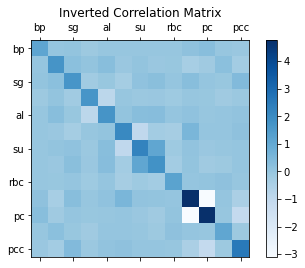

In [91]:
#Multicollinearity
lt=kidney_df[['bp','sg','al','su',
               'rbc','pc','pcc','ba','bgr',
               'bu','sc','sod','pot','hemo',
               'pcv','wc','rc','htn','dm',
               'cad','appet','pe','ane','classification']]
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(np.linalg.inv(lt.corr()),cmap='Blues')
fig.colorbar(cax)
ax.set_xticklabels(['']+['bp','sg','al','su',
               'rbc','pc','pcc','ba','bgr',
               'bu','sc','sod','pot','hemo',
               'pcv','wc','rc','htn','dm',
               'cad','appet','pe','ane','classification'])
ax.set_yticklabels(['']+['bp','sg','al','su',
               'rbc','pc','pcc','ba','bgr',
               'bu','sc','sod','pot','hemo',
               'pcv','wc','rc','htn','dm',
               'cad','appet','pe','ane','classification'])
ax.set_title('Inverted Correlation Matrix')
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


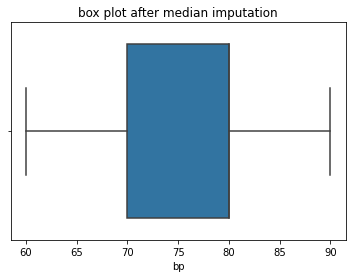

In [15]:
q1 =kidney_df['bp'].quantile(0.25)
q3 =kidney_df['bp'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['bp'])
for i in kidney_df['bp']:
    if i>upper_trial or i<lower_trial:
        kidney_df['bp']=kidney_df['bp'].replace(i,med)
sms.boxplot(kidney_df['bp'])
plt.title("box plot after median imputation")
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


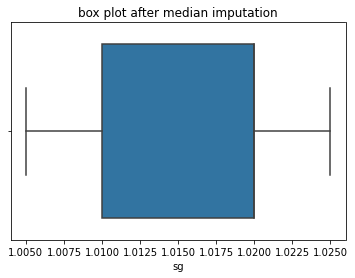

In [16]:
q1 =kidney_df['sg'].quantile(0.25)
q3 =kidney_df['sg'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['sg'])
for i in kidney_df['sg']:
    if i>upper_trial or i<lower_trial:
        kidney_df['sg']=kidney_df['sg'].replace(i,med)
sms.boxplot(kidney_df['sg'])
plt.title("box plot after median imputation")
plt.show()

In [ ]:
'bp','sg','al','su','''bgr''','''bu''',''''sc''','sod','pot','hemo','pcv','''wc''','''rc'''

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


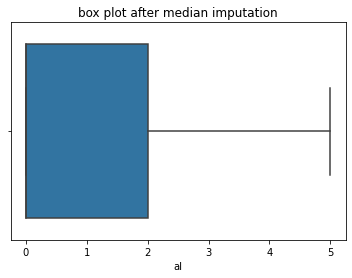

In [17]:
q1 =kidney_df['al'].quantile(0.25)
q3 =kidney_df['al'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['al'])
for i in kidney_df['al']:
    if i>upper_trial or i<lower_trial:
        kidney_df['al']=kidney_df['al'].replace(i,med)
sms.boxplot(kidney_df['al'])
plt.title("box plot after median imputation")
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


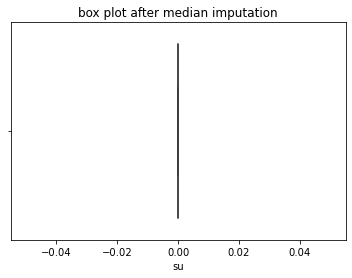

In [18]:
q1 =kidney_df['su'].quantile(0.25)
q3 =kidney_df['su'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['su'])
for i in kidney_df['su']:
    if i>upper_trial or i<lower_trial:
        kidney_df['su']=kidney_df['su'].replace(i,med)
sms.boxplot(kidney_df['su'])
plt.title("box plot after median imputation")
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


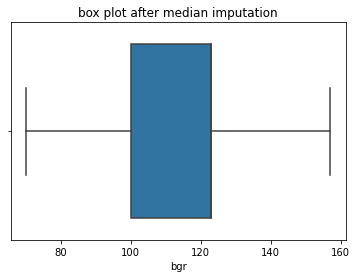

In [26]:
q1 =kidney_df['bgr'].quantile(0.25)
q3 =kidney_df['bgr'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['bgr'])
for i in kidney_df['bgr']:
    if i>upper_trial or i<lower_trial:
        kidney_df['bgr']=kidney_df['bgr'].replace(i,med)
sms.boxplot(kidney_df['bgr'])
plt.title("box plot after median imputation")
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


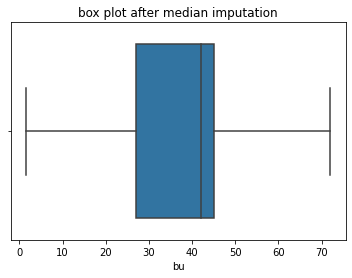

In [29]:
q1 =kidney_df['bu'].quantile(0.25)
q3 =kidney_df['bu'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['bu'])
for i in kidney_df['bu']:
    if i>upper_trial or i<lower_trial:
        kidney_df['bu']=kidney_df['bu'].replace(i,med)
sms.boxplot(kidney_df['bu'])
plt.title("box plot after median imputation")
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


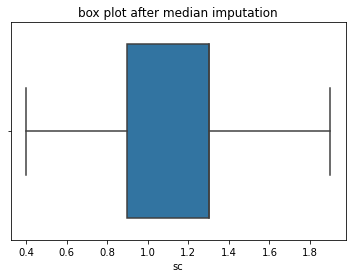

In [32]:
q1 =kidney_df['sc'].quantile(0.25)
q3 =kidney_df['sc'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['sc'])
for i in kidney_df['sc']:
    if i>upper_trial or i<lower_trial:
        kidney_df['sc']=kidney_df['sc'].replace(i,med)
sms.boxplot(kidney_df['sc'])
plt.title("box plot after median imputation")
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


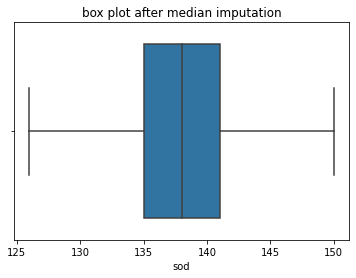

In [31]:
q1 =kidney_df['sod'].quantile(0.25)
q3 =kidney_df['sod'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['sod'])
for i in kidney_df['sod']:
    if i>upper_trial or i<lower_trial:
        kidney_df['sod']=kidney_df['sod'].replace(i,med)
sms.boxplot(kidney_df['sod'])
plt.title("box plot after median imputation")
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


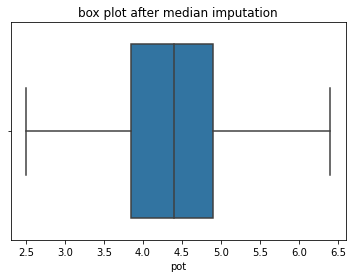

In [40]:
q1 =kidney_df['pot'].quantile(0.25)
q3 =kidney_df['pot'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['pot'])
for i in kidney_df['pot']:
    if i>upper_trial or i<lower_trial:
        kidney_df['pot']=kidney_df['pot'].replace(i,med)
sms.boxplot(kidney_df['pot'])
plt.title("box plot after median imputation")
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


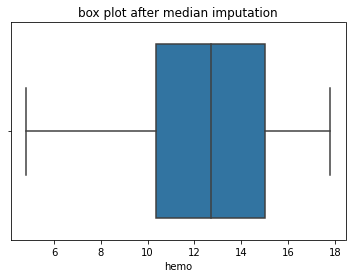

In [41]:
q1 =kidney_df['hemo'].quantile(0.25)
q3 =kidney_df['hemo'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['hemo'])
for i in kidney_df['hemo']:
    if i>upper_trial or i<lower_trial:
        kidney_df['hemo']=kidney_df['hemo'].replace(i,med)
sms.boxplot(kidney_df['hemo'])
plt.title("box plot after median imputation")
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


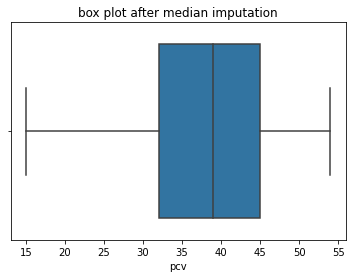

In [53]:
q1 =kidney_df['pcv'].quantile(0.25)
q3 =kidney_df['pcv'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['pcv'])
for i in kidney_df['pcv']:
    if i>upper_trial or i<lower_trial:
        kidney_df['pcv']=kidney_df['pcv'].replace(i,med)
sms.boxplot(kidney_df['pcv'])
plt.title("box plot after median imputation")
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


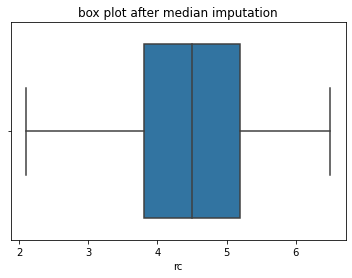

In [54]:
q1 =kidney_df['rc'].quantile(0.25)
q3 =kidney_df['rc'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['rc'])
for i in kidney_df['rc']:
    if i>upper_trial or i<lower_trial:
        kidney_df['rc']=kidney_df['rc'].replace(i,med)
sms.boxplot(kidney_df['rc'])
plt.title("box plot after median imputation")
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


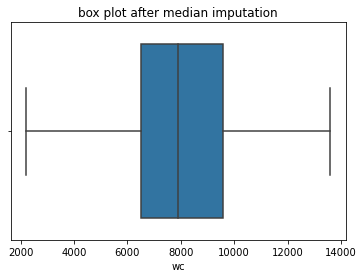

In [56]:
q1 =kidney_df['wc'].quantile(0.25)
q3 =kidney_df['wc'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['wc'])
for i in kidney_df['wc']:
    if i>upper_trial or i<lower_trial:
        kidney_df['wc']=kidney_df['wc'].replace(i,med)
sms.boxplot(kidney_df['wc'])
plt.title("box plot after median imputation")
plt.show()

In [75]:
x = kidney_df[['su','bp']]

#normalize values in first two columns only 
kidney_df[['su','bp']] = (x-x.min())/ (x.max() - x.min())
kidney_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,0.230769,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,0.000000,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,0.230769,1.010,2.0,0.6,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,0.153846,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,0.230769,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,0.230769,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,0.153846,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,0.230769,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,0.076923,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


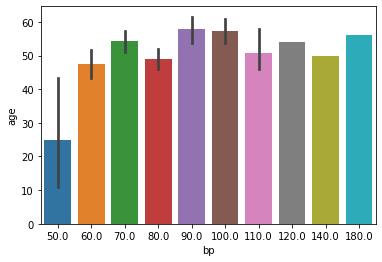

In [65]:
sms.barplot(x = 'bp' , y  = 'age' , data = kidney_df)
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bp', ylabel='Density'>

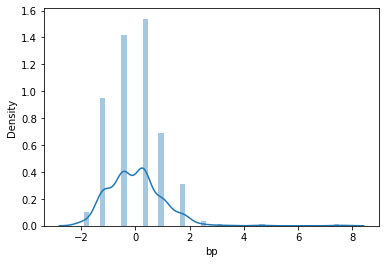

In [87]:
sms.distplot(kidney_df['bp'])

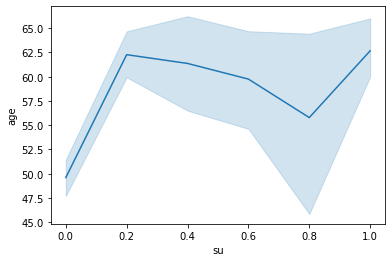

In [82]:
sms.lineplot(x = 'su' , y = 'age' , data =kidney_df)
plt.show()

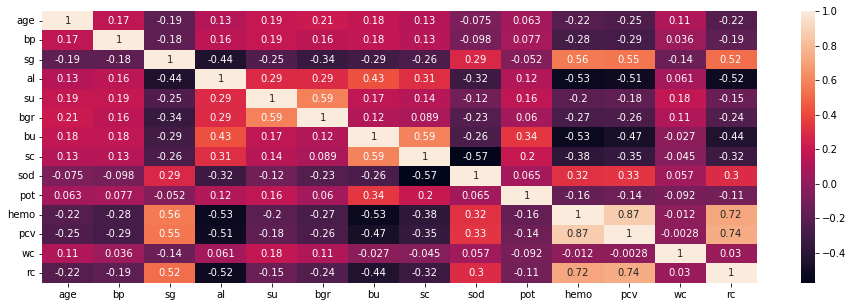

In [83]:
plt.figure(figsize = (16,5))
sms.heatmap(kidney_df.corr() , annot = True)
plt.show()

In [85]:
#standardization
x = kidney_df[['bp','su']]
kidney_df[['bp','su']]= (x-x.mean())/x.std()
kidney_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,0.275862,1.020,1.0,-0.416931,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,-1.895854,1.020,4.0,-0.416931,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,0.275862,1.010,2.0,2.330600,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,-0.448044,1.005,4.0,-0.416931,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,0.275862,1.010,2.0,-0.416931,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,0.275862,1.020,0.0,-0.416931,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,-0.448044,1.025,0.0,-0.416931,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,0.275862,1.020,0.0,-0.416931,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,-1.171949,1.025,0.0,-0.416931,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd
